In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('railway.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [4]:
df.head(5)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


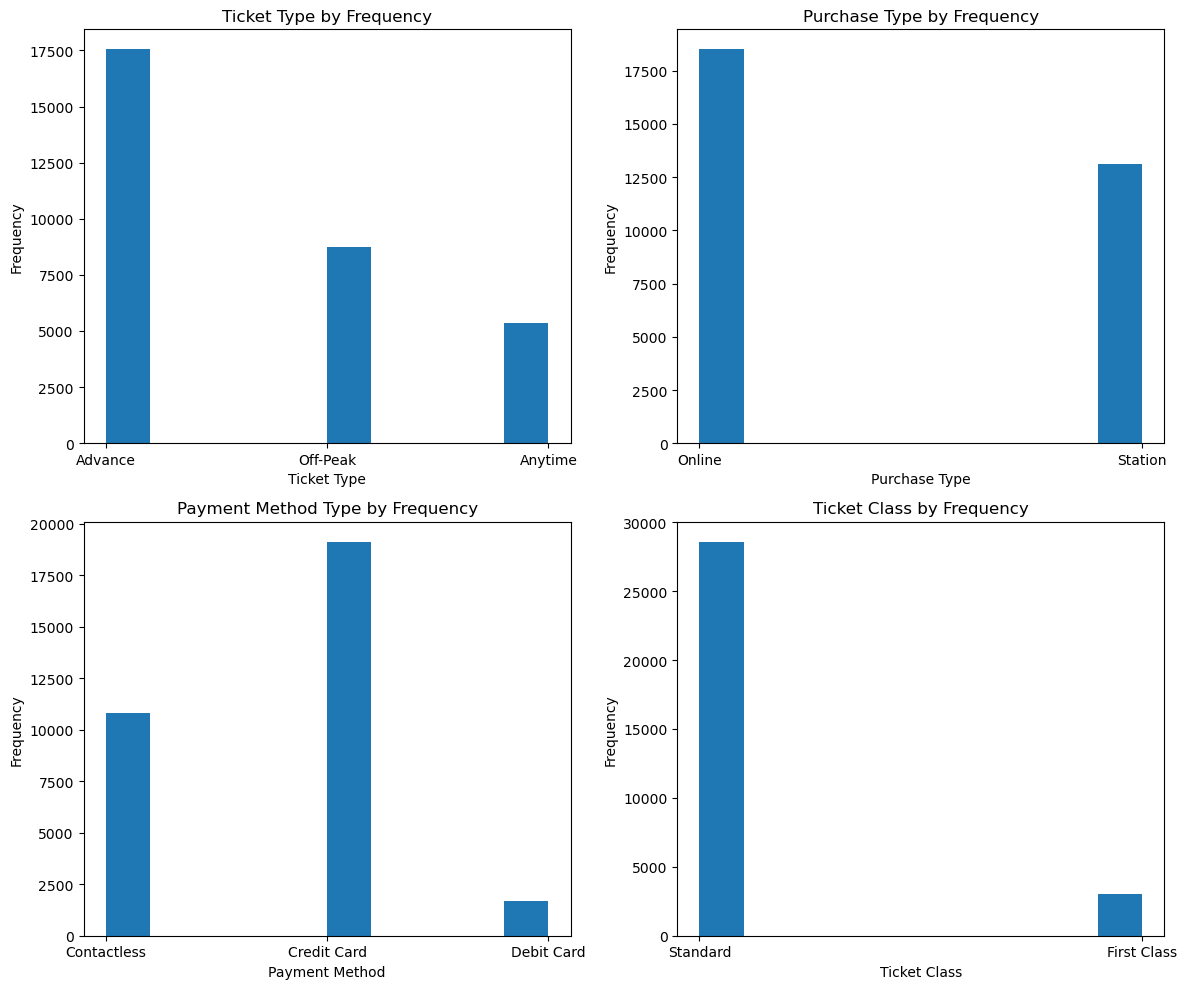

In [5]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))


# Plot 1: Ticket Type by Frequency
axs[0, 0].hist(df['Ticket Type'], bins=10)
axs[0, 0].set_xlabel('Ticket Type')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Ticket Type by Frequency')
axs[0, 0].grid(False)

# Plot 2: Purchase Type by Frequency
axs[0, 1].hist(df['Purchase Type'], bins=10)
axs[0, 1].set_xlabel('Purchase Type')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Purchase Type by Frequency')
axs[0, 1].grid(False)

# Plot 3: Payment Method Type by Frequency
axs[1, 0].hist(df['Payment Method'], bins=10)
axs[1, 0].set_xlabel('Payment Method')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Payment Method Type by Frequency')
axs[1, 0].grid(False)

# Plot 4: Payment Method by Frequency (same as previous, may want to adjust)
axs[1, 1].hist(df['Ticket Class'], bins=10)
axs[1, 1].set_xlabel('Ticket Class')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Ticket Class by Frequency')
axs[1, 1].grid(False)

# Adjust layout
plt.tight_layout()


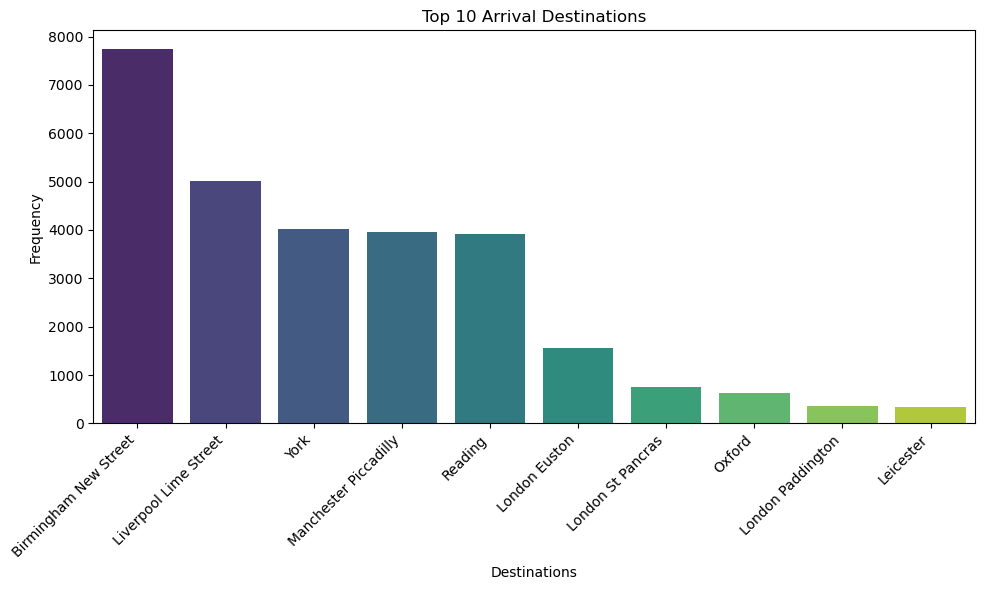

In [6]:
top_destinations = df['Arrival Destination'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_destinations.index, y=top_destinations.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Arrival Destinations')
plt.xlabel('Destinations')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

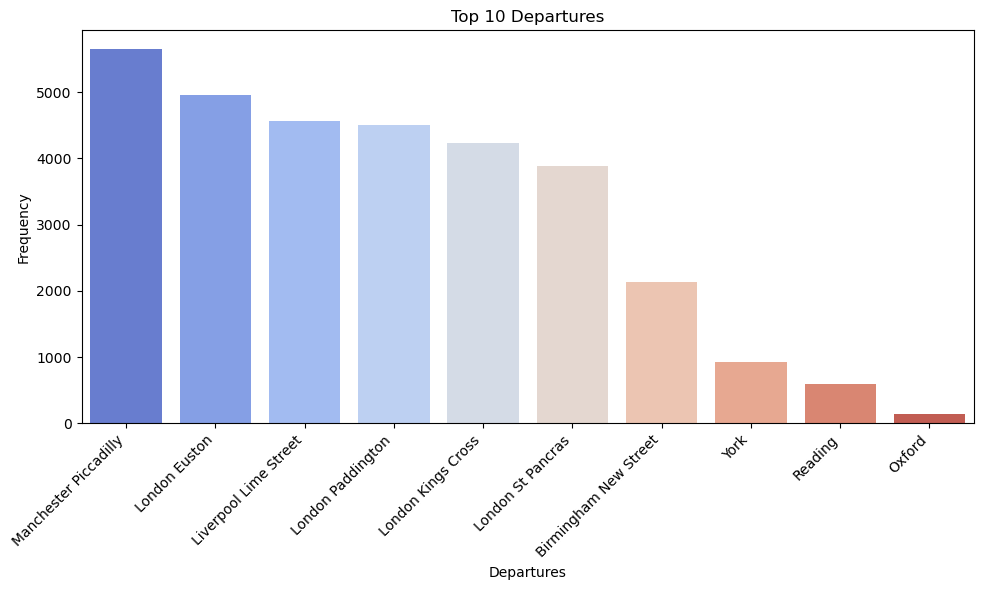

In [7]:
top_departures = df['Departure Station'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_departures.index, y=top_departures.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Departures')
plt.xlabel('Departures')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

NameError: name 'te' is not defined

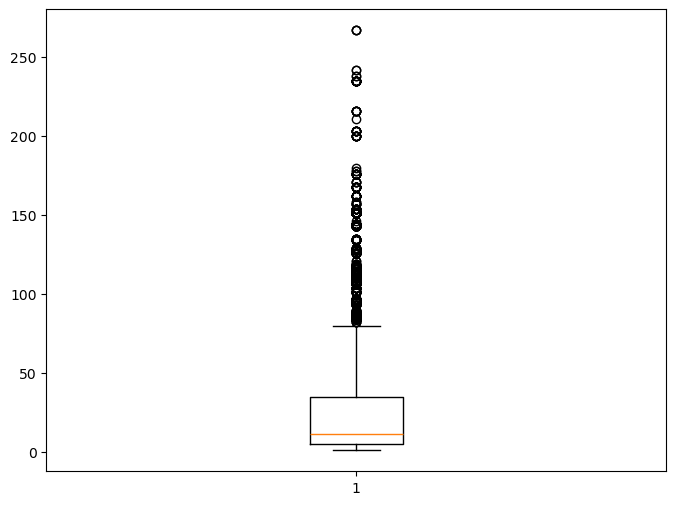

In [8]:
percentiles = np.percentile(df['Price'], [25, 50, 75])
median = np.median(df['Price'])


plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'])
plt.xlabel('Price', te)
plt.grid(False)

plt.xticks([1], [f'25th: {percentiles[0]:.2f}\n50th: {percentiles[1]:.2f}\n75th: {percentiles[2]:.2f}'])

plt.axhline(y=median, color='green', linestyle='--', label=f'Median: {median:.2f}')


plt.show()

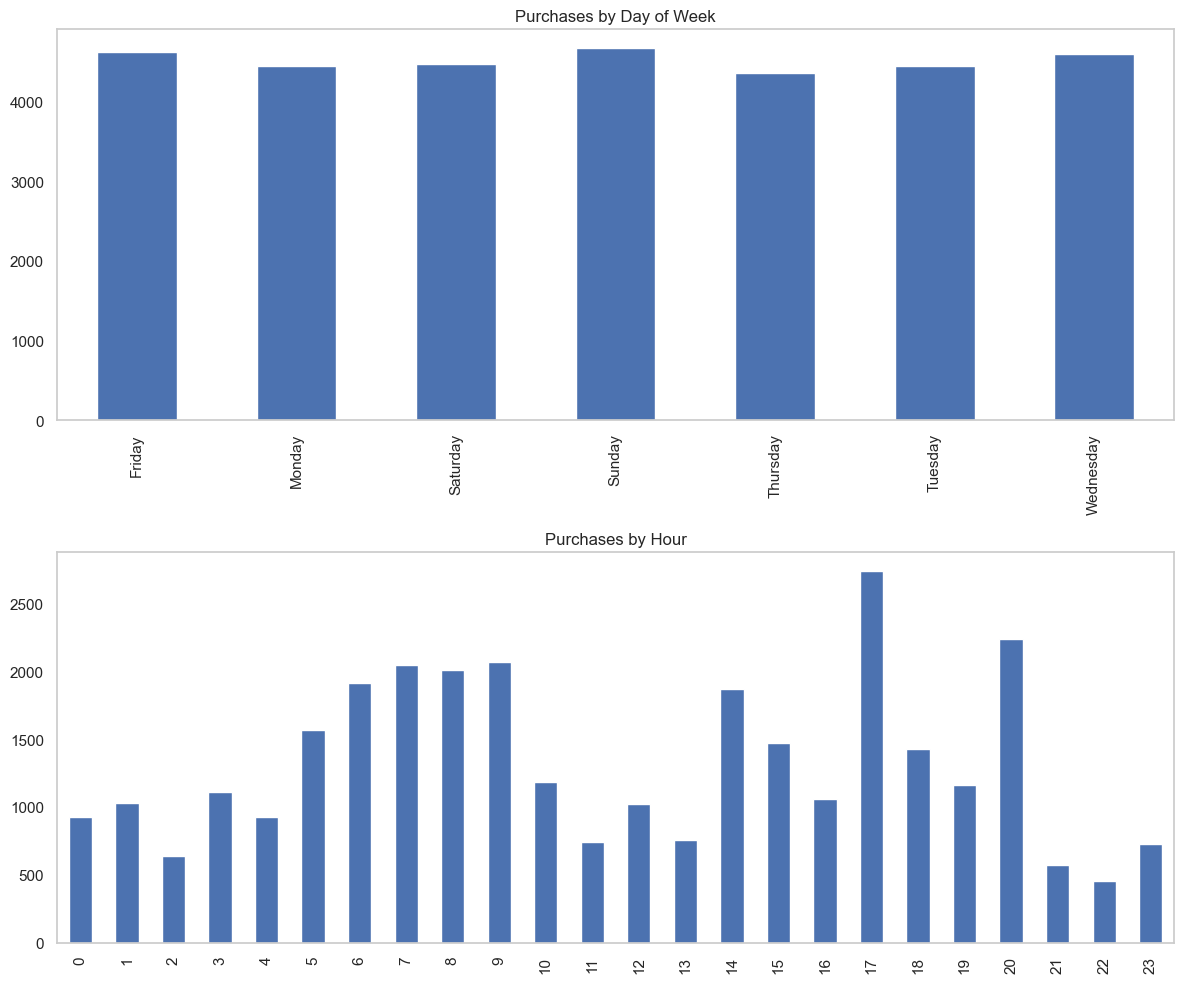

In [ ]:
def time_to_string(t):
    if isinstance(t, str):
        return t
    elif pd.isnull(t):
        return ''
    else:
        return t.strftime('%H:%M:%S')

if not pd.api.types.is_datetime64_any_dtype(df['Date of Purchase']):
    df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

# Purchases by day of week
purchases_by_day = df['Date of Purchase'].dt.day_name().value_counts().sort_index()

# Extract hour from Time of Purchase
df['Hour of Purchase'] = pd.to_datetime(df['Time of Purchase'].apply(time_to_string), format='%H:%M:%S').dt.hour
purchases_by_hour = df['Hour of Purchase'].value_counts().sort_index()

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

purchases_by_day.plot(kind='bar', ax=ax1)
ax1.set_title('Purchases by Day of Week')
ax1.grid(False)  # Disable grid for the first subplot

purchases_by_hour.plot(kind='bar', ax=ax2)
ax2.set_title('Purchases by Hour')
ax2.grid(False)  # Disable grid for the second subplot

plt.tight_layout()


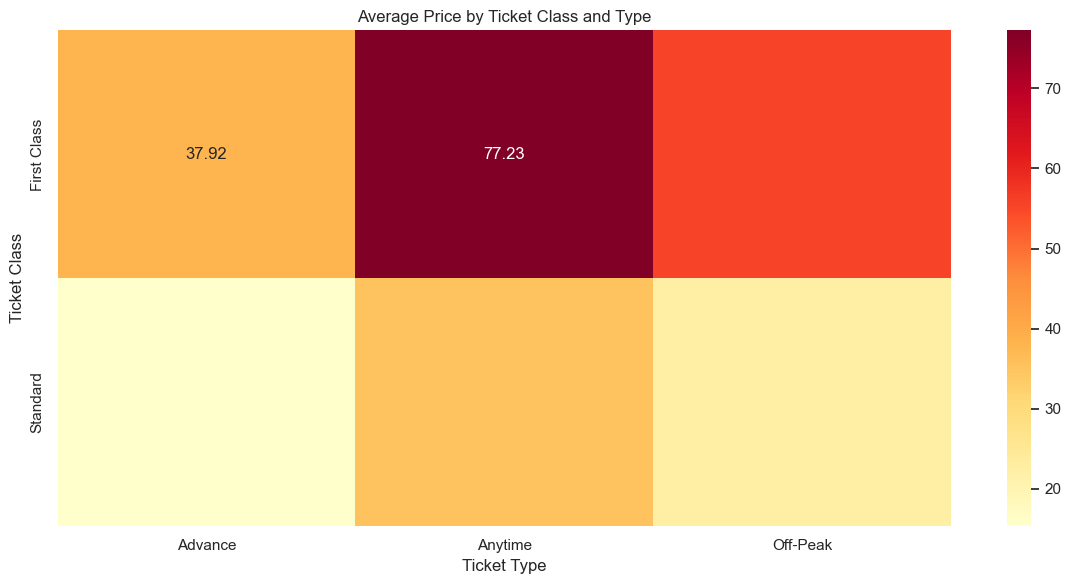

In [ ]:

if not pd.api.types.is_datetime64_any_dtype(df['Date of Journey']):
    df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])
    
# Average price by ticket class and type
avg_price = df.groupby(['Ticket Class', 'Ticket Type'])['Price'].mean().unstack()
    
# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(avg_price, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Average Price by Ticket Class and Type')
plt.tight_layout()
plt.grid(False)
plt.show()

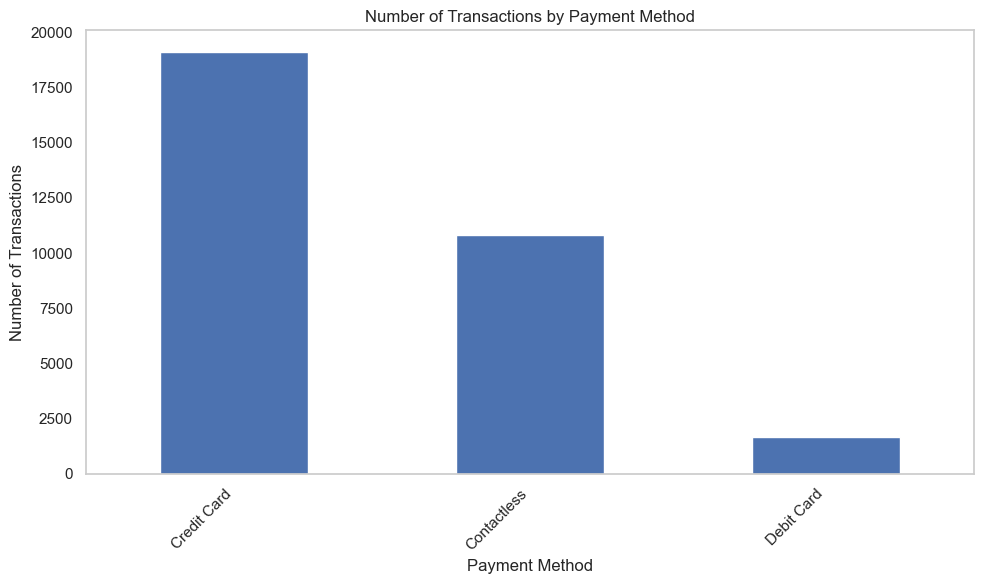

In [ ]:

payment_counts = df['Payment Method'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar')
plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(False)
plt.show()

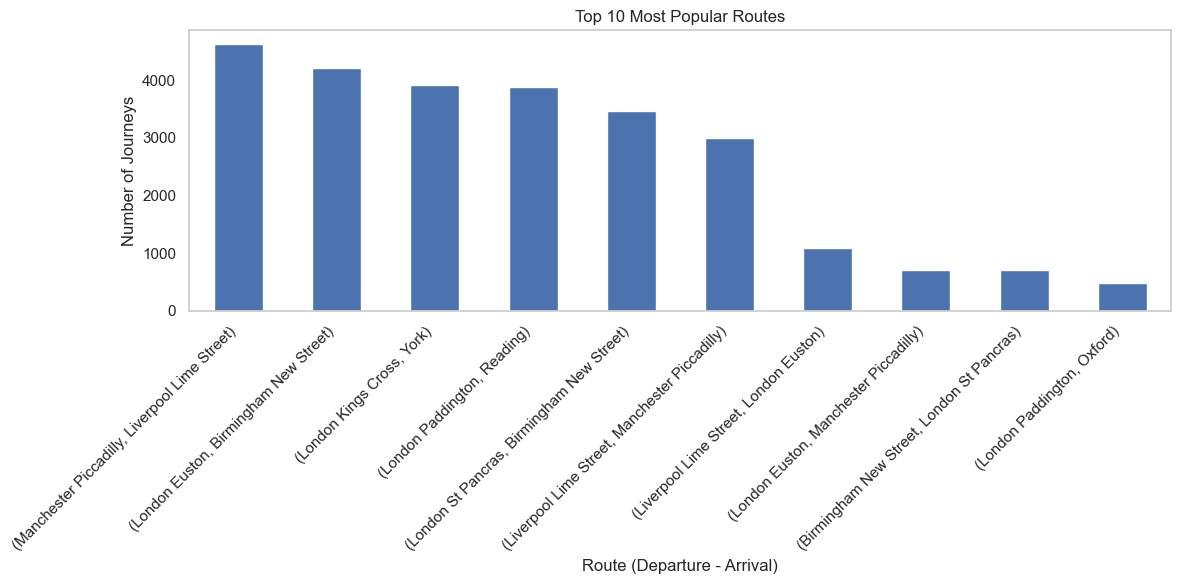

In [ ]:

# Count of journeys by route
route_counts = df.groupby(['Departure Station', 'Arrival Destination']).size().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
route_counts.plot(kind='bar')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Route (Departure - Arrival)')
plt.ylabel('Number of Journeys')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()



 This problem is unconstrained.


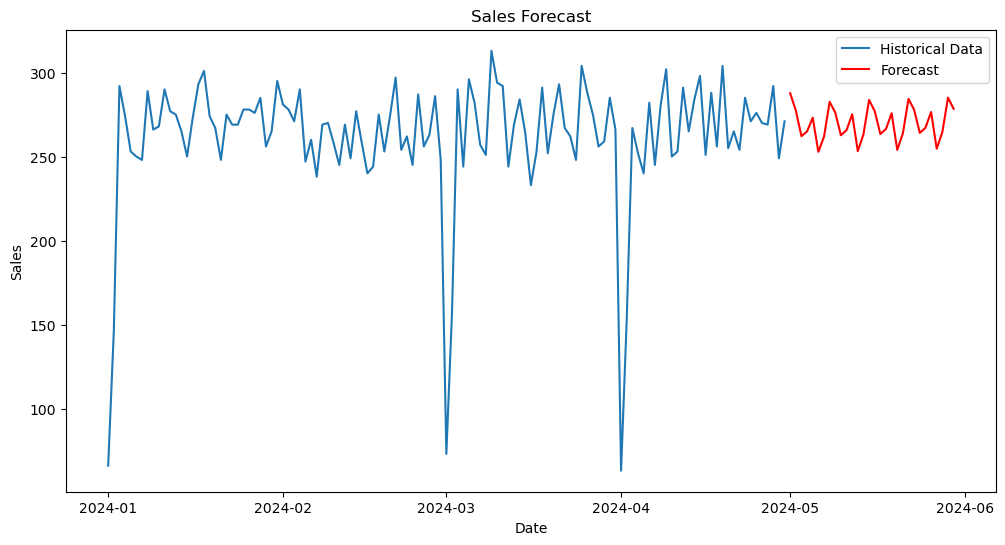

 This problem is unconstrained.


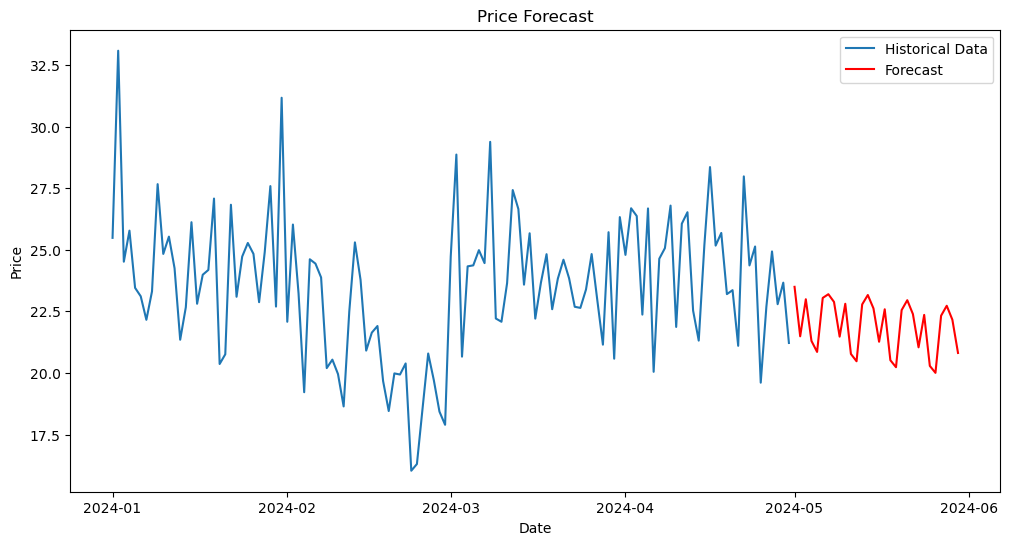

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

def advanced_forecast(df, column_to_forecast='Price', days_to_forecast=30):
    df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])
    
    if column_to_forecast == 'Sales':
        daily_data = df.groupby('Date of Journey').size()
    else:
        daily_data = df.groupby('Date of Journey')[column_to_forecast].mean()
    
    daily_data = daily_data.resample('D').mean().fillna(method='ffill')

    # Add day of week as a feature
    daily_data = pd.DataFrame(daily_data)
    daily_data['day_of_week'] = daily_data.index.dayofweek

    # Fit SARIMA model
    model = SARIMAX(daily_data[daily_data.columns[0]], 
                    exog=daily_data['day_of_week'],
                    order=(1, 1, 1), 
                    seasonal_order=(1, 1, 1, 7))
    results = model.fit()

    # Create future dates and their day of week
    future_dates = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=days_to_forecast)
    future_dow = pd.DataFrame({'day_of_week': future_dates.dayofweek}, index=future_dates)

    # Forecast
    forecast = results.forecast(steps=days_to_forecast, exog=future_dow)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(daily_data.index, daily_data[daily_data.columns[0]], label='Historical Data')
    plt.plot(forecast.index, forecast, color='red', label='Forecast')
    plt.title(f'{column_to_forecast} Forecast')
    plt.xlabel('Date')
    plt.ylabel(column_to_forecast)
    plt.legend()
    plt.show()

    return forecast

# Assuming df is your DataFrame
sales_forecast = advanced_forecast(df, column_to_forecast='Sales')
print("\nSales Forecast:")
print(sales_forecast)

price_forecast = advanced_forecast(df, column_to_forecast='Price')
print("\nPrice Forecast:")
print(price_forecast)